In [2]:
import os
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle, Circle
%matplotlib inline
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization.wcsaxes import WCSAxes, add_beam
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from matplotlib import pyplot, image, transforms

In [3]:
#Import images
imageList = []
for file in glob.glob("images/*flt.fits"):
    imageList.append(file)
    
    
#Drizzled image
drz = fits.open("j92103040_drz.fits")
wcsDrz = WCS(drz[1].header)

In [4]:
#Find pixel center of drizzle
#drz[1].header
drzCenterX, drzCenterY = drz[1].header['NAXIS1']/2, drz[1].header['NAXIS2']/2

In [5]:
#For each flt image:
#1: get center pixel values
#2: Find RA & DEC of the center
#3: Find that RA & DEC on drizzle
#4: Find the pixel that corresponds to that RA & DEC
#5: Find the offset from the drizzle center to these locations.



for file in imageList:
#file = 'images/j92103lfq_flt.fits'   
    img = fits.open(file)
    wcs1 = WCS(img[('DQ',1)].header)
    

    #step 1:
    #chip 1 (lower)
    chip1X, chip1Y = img[('Sci', 1)].header['NAXIS1']/2, img[('Sci', 1)].header['NAXIS2']/2 #center in X and Y
    #chip1X, chip1Y = 2830.39, 534.023

   
    #2 & 3:
    sky1 = wcs1.pixel_to_world(chip1X, chip1Y)
    
    #print(sky1)

    #4:
    pixel1 = wcsDrz.world_to_pixel(sky1)
    

    #5:
    dx1= drzCenterX - pixel1[0]
    dy1= drzCenterY - pixel1[1] 

    print(img[0].header['filename'] + " chip 1: ", dx1, dy1)
    img = fits.open(file)
    wcs2 = WCS(img[('DQ',2)].header)
     
        
    #1:
    #chip 2 (upper)
    chip2X, chip2Y = img[('Sci', 2)].header['NAXIS1']/2, img[('Sci', 2)].header['NAXIS2']/2 #center in X and Y
    
    #2 & 3:
    sky2 = wcs2.pixel_to_world(chip2X, chip2Y)
    
    #4:
    pixel2 = wcsDrz.world_to_pixel(sky2)
    
    #5:
    dx2 = drzCenterX-pixel2[0]
    dy2 = drzCenterY-pixel2[1]
    print(img[0].header['filename'] + " chip 2: ", dx2, dy2)

#for file in imageList:
    

#print(pixel1)

j92103leq_flt.fits chip 1:  35.33710672301004 1041.8565405025863
j92103leq_flt.fits chip 2:  -50.58163792228652 -1035.6345570502954
j92103lfq_flt.fits chip 1:  35.33707764675455 1041.8565274292882
j92103lfq_flt.fits chip 2:  -50.58732684952838 -1035.7057273668925
j92103lhq_flt.fits chip 1:  35.337208088564694 1041.8565924390211
j92103lhq_flt.fits chip 2:  -50.5704023485946 -1035.4379218870254
j92103ljq_flt.fits chip 1:  35.33721595168208 1041.8566002952127
j92103ljq_flt.fits chip 2:  -50.56974469583474 -1035.4221447409336
j92103llq_flt.fits chip 1:  35.337221209957534 1041.8566055474146
j92103llq_flt.fits chip 2:  -50.56930483337874 -1035.4115942471221
j92103lnq_flt.fits chip 1:  35.33713437673123 1041.856568123645
j92103lnq_flt.fits chip 2:  -50.579324962324336 -1035.5790759546244
j92103lqq_flt.fits chip 1:  40.36219115340782 1043.1229481812522
j92103lqq_flt.fits chip 2:  -45.55715618615113 -1034.3738058643348
j92103lrq_flt.fits chip 1:  40.362159771681036 1043.1229328035731
j92103lrq

In [8]:
#For each flt image:
#1: get center pixel values
#2: Find RA & DEC of the center
#3: Find that RA & DEC on drizzle
#4: Find the pixel that corresponds to that RA & DEC
#5: Find the offset from the pixel location on the drizzle to the pixel location on the flt



for file in imageList:
#file = 'images/j92103lfq_flt.fits'   
    img = fits.open(file)
    wcs1 = WCS(img[('DQ',1)].header)
    

    #step 1:
    #chip 1 (lower)
    chip1X, chip1Y = img[('Sci', 1)].header['NAXIS1']/2, img[('Sci', 1)].header['NAXIS2']/2 #center in X and Y
    #chip1X, chip1Y = 2830.39, 534.023

   
    #2 & 3:
    sky1 = wcs1.pixel_to_world(chip1X, chip1Y)
    
    #print(sky1)

    #4:
    pixel1 = wcsDrz.world_to_pixel(sky1)
    

    #5:
    dx1= chip1X - pixel1[0]
    dy1= chip1Y - pixel1[1] 

    print(img[0].header['filename'] + " chip 1: ", dx1, dy1)
    img = fits.open(file)
    wcs2 = WCS(img[('DQ',2)].header)
     
        
    #1:
    #chip 2 (upper)
    chip2X, chip2Y = img[('Sci', 2)].header['NAXIS1']/2, img[('Sci', 2)].header['NAXIS2']/2 #center in X and Y
    
    #2 & 3:
    sky2 = wcs2.pixel_to_world(chip2X, chip2Y)
    
    #4:
    pixel2 = wcsDrz.world_to_pixel(sky2)
    
    #5:
    dx2 = chip2X-pixel2[0]
    dy2 = chip2Y-pixel2[1]
    print(img[0].header['filename'] + " chip 2: ", dx2, dy2)

#for file in imageList:
    

#print(pixel1)

j92103leq_flt.fits chip 1:  -25.662893276989962 -55.14345949741369
j92103leq_flt.fits chip 2:  -111.58163792228652 -2132.6345570502954
j92103lfq_flt.fits chip 1:  -25.66292235324545 -55.143472570711765
j92103lfq_flt.fits chip 2:  -111.58732684952838 -2132.7057273668925
j92103lhq_flt.fits chip 1:  -25.662791911435306 -55.14340756097886
j92103lhq_flt.fits chip 2:  -111.5704023485946 -2132.4379218870254
j92103ljq_flt.fits chip 1:  -25.662784048317917 -55.14339970478727
j92103ljq_flt.fits chip 2:  -111.56974469583474 -2132.4221447409336
j92103llq_flt.fits chip 1:  -25.662778790042466 -55.143394452585426
j92103llq_flt.fits chip 2:  -111.56930483337874 -2132.411594247122
j92103lnq_flt.fits chip 1:  -25.66286562326877 -55.14343187635495
j92103lnq_flt.fits chip 2:  -111.57932496232434 -2132.5790759546244
j92103lqq_flt.fits chip 1:  -20.63780884659218 -53.87705181874776
j92103lqq_flt.fits chip 2:  -106.55715618615113 -2131.373805864335
j92103lrq_flt.fits chip 1:  -20.637840228318964 -53.8770671

In [210]:
#img = fits.open('images/j92103leq_flt.fits')
img.info()

Filename: images/j92103lfq_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     260   ()      
  1  SCI           1 ImageHDU       244   (4096, 2048)   float32   
  2  ERR           1 ImageHDU        53   (4096, 2048)   float32   
  3  DQ            1 ImageHDU        45   (4096, 2048)   int16   
  4  SCI           2 ImageHDU       242   (4096, 2048)   float32   
  5  ERR           2 ImageHDU        53   (4096, 2048)   float32   
  6  DQ            2 ImageHDU        45   (4096, 2048)   int16   
  7  HDRLET        1 HeaderletHDU     22   ()      
  8  HDRLET        2 HeaderletHDU     26   ()      
  9  WCSCORR       1 BinTableHDU     59   14R x 24C   [40A, I, A, 24A, 24A, 24A, 24A, D, D, D, D, D, D, D, D, 24A, 24A, D, D, D, D, J, 40A, 128A]   
 10  HDRLET       18 HeaderletHDU     26   ()      
 11  WCSDVARR      1 ImageHDU        15   (64, 32)   float32   
 12  WCSDVARR      2 ImageHDU        15   (64, 32)   float32   
 13  D2IMARR  

In [311]:
img[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2022-07-08' / date this file was written (yyyy-mm-dd)                
NEXTEND =                   20 / Number of standard extensions                  
FILENAME= 'j92103lfq_flt.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

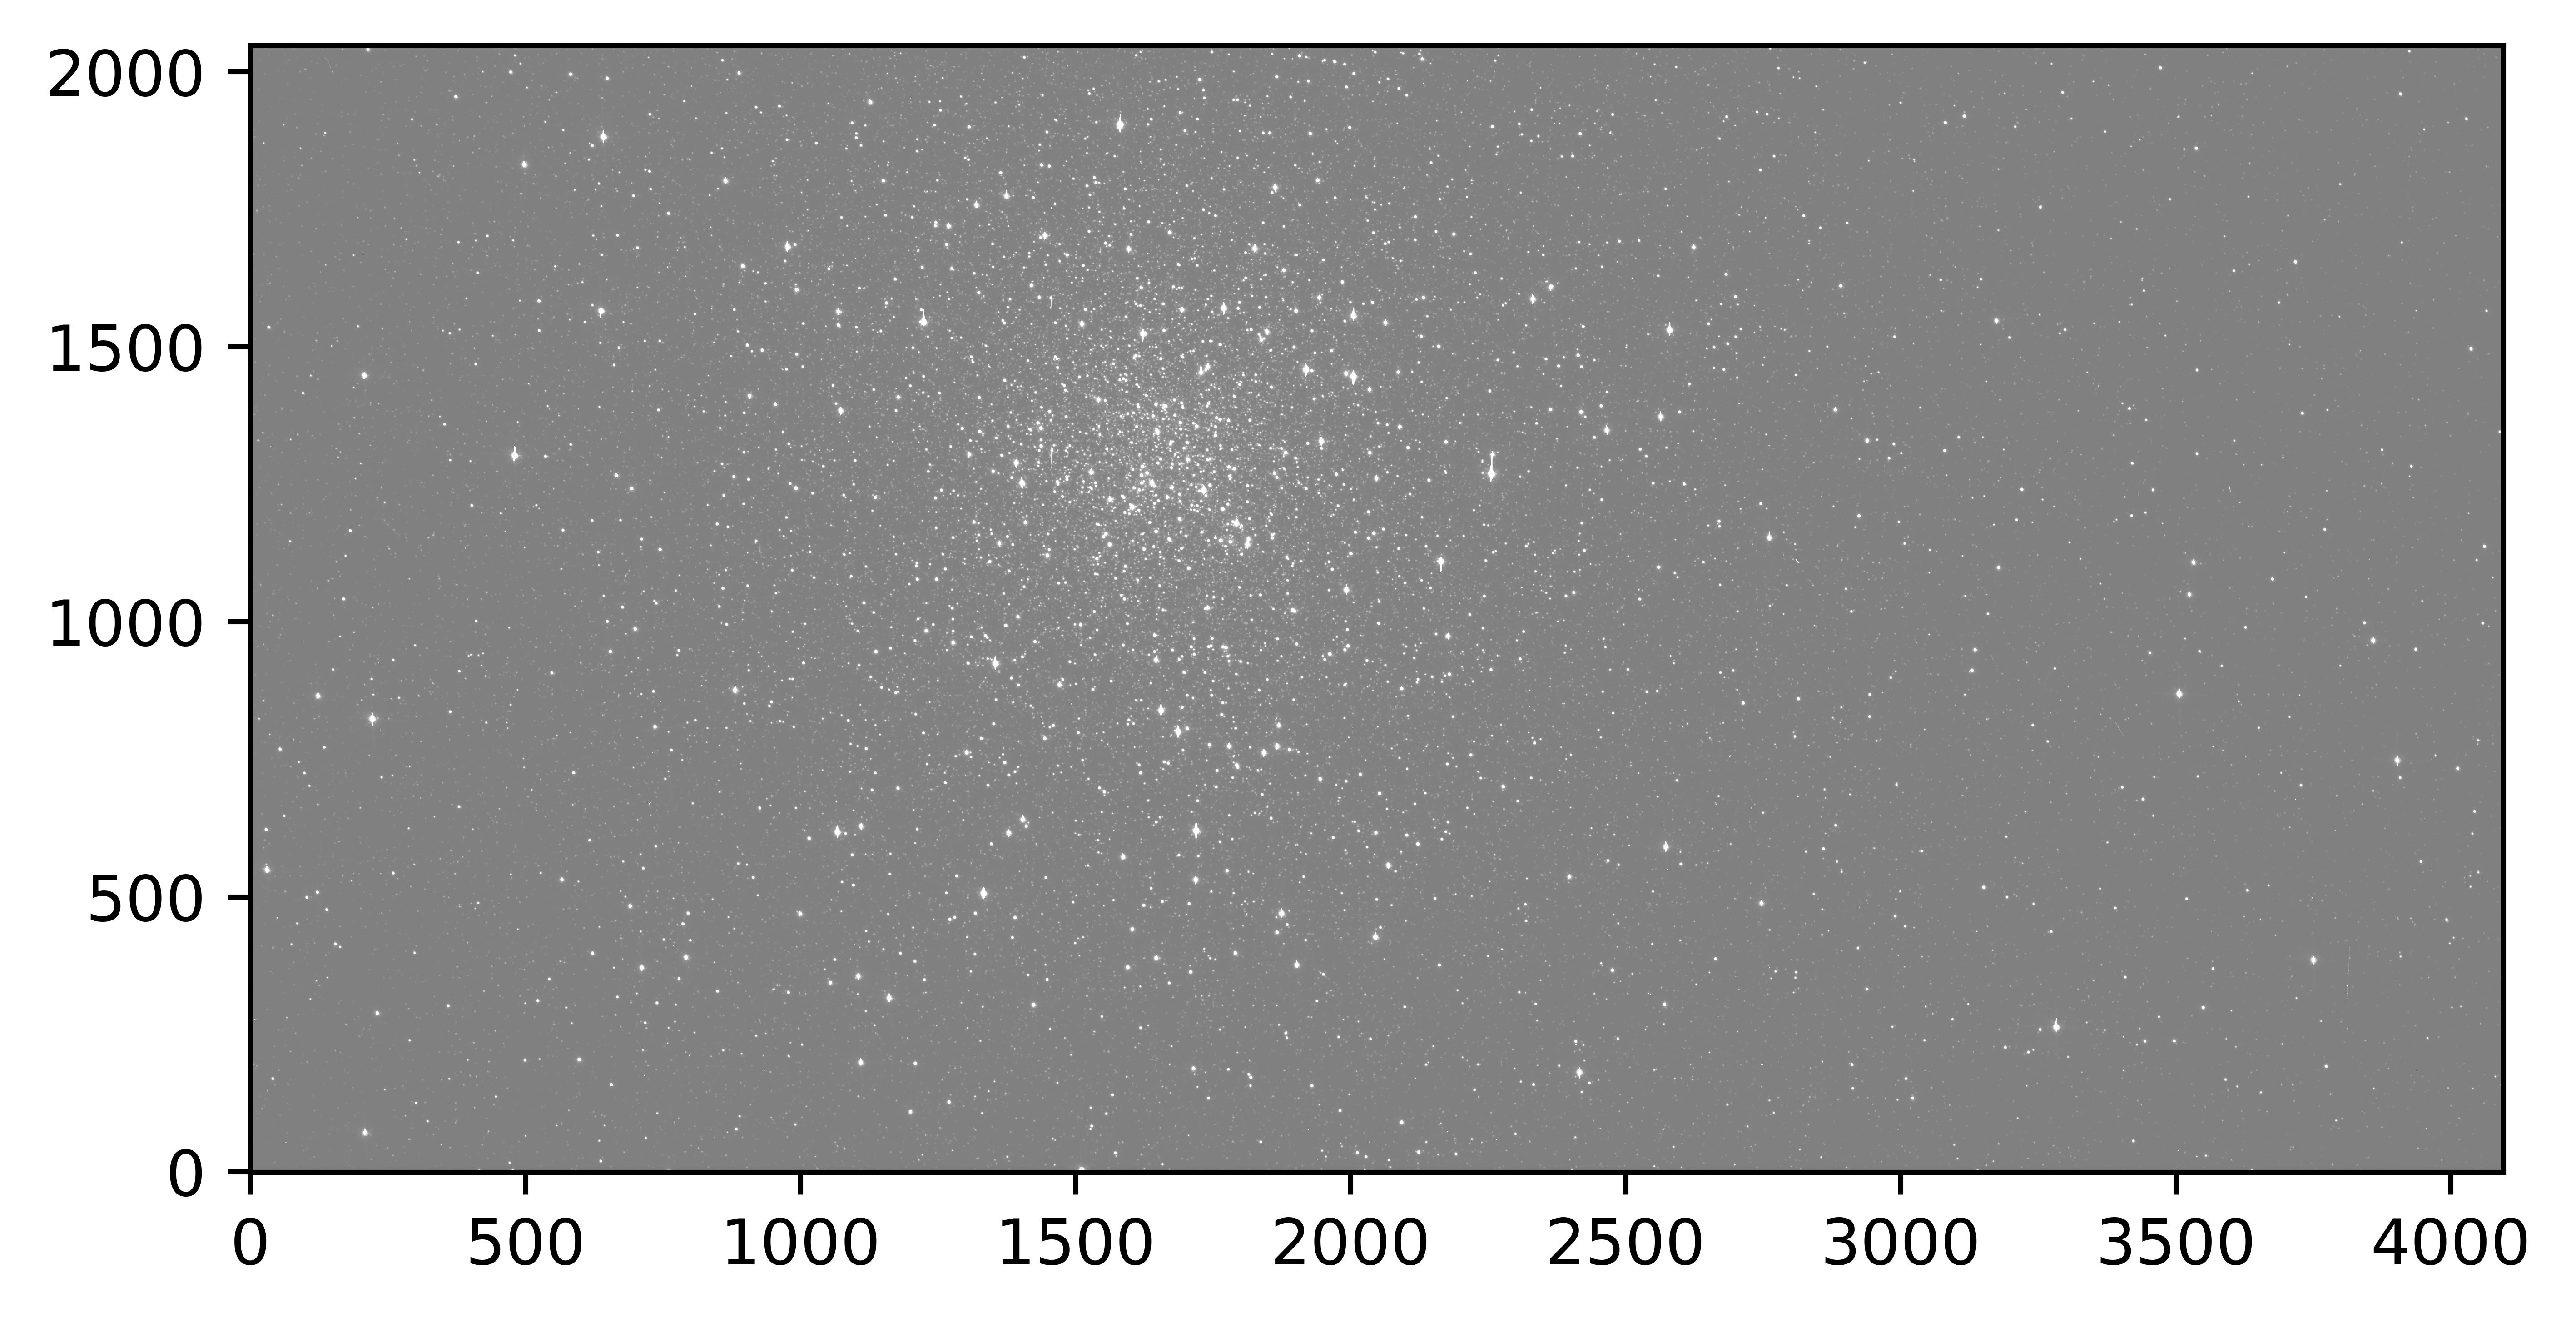

In [96]:
def scale_plot_size(factor=10):
    default_dpi = plt.rcParamsDefault['figure.dpi']
    plt.rcParams['figure.dpi'] = default_dpi*factor
    plt.rcParams['agg.path.chunksize'] = 1000

scale_plot_size(10)

image_data_Hubble = img[4].data
plotDataHubble = image_data_Hubble

fig, ax = plt.subplots()


ax.imshow(image_data_Hubble, origin = 'lower', vmin = -5e3, vmax = 5e3, cmap = 'gray')


In [ ]:
#Get centers of each flt image in x & y

for flt in images:
    img = fits.open(flt)[0]
    wcs = WCS(img)